In [1]:
# Imports
import sys
import os
import pickle
import matplotlib.pyplot as plt
from pde import MemoryStorage

PROJECT_ROOT = os.path.abspath(os.path.join(os.path.abspath('../..'),os.pardir))
sys.path.append(PROJECT_ROOT)

from AdvectionDiffusionSPlimitScript import *

%matplotlib widget

In [2]:
# Load simulation parameters
import pickle

eSource1, eSource2, eSource3, NB_PARTICLES = pickle.load(open('simargv.pkl', 'rb'))
tmax1 = eSource1
tmax2 = eSource2
tmax3 = eSource3

In [3]:
print(eSource1, eSource2, eSource3, NB_PARTICLES)

5.0 40.0 100.0 40000


In [4]:
# solve the equation and store the trajectory
storage1 = MemoryStorage()
result1 = eq1.solve(state1, t_range=tmax1, tracker=storage1.tracker(1), dt=1e-5)

storage2 = MemoryStorage()
result2 = eq2.solve(state1, t_range=tmax2, tracker=storage2.tracker(1), dt=1e-5)

storage3 = MemoryStorage()
result3 = eq3.solve(state1, t_range=tmax3, tracker=storage3.tracker(1), dt=1e-5)

In [5]:
trackEndEstimatorx1 = pickle.load(open(file1, 'rb'))[0]
trackEndEstimatorx2 = pickle.load(open(file2, 'rb'))[0]
trackEndEstimatorx3 = pickle.load(open(file3, 'rb'))[0]

Text(0.5, 0.98, 'Advection-Diffusion limit test with position-dependent stopping power')

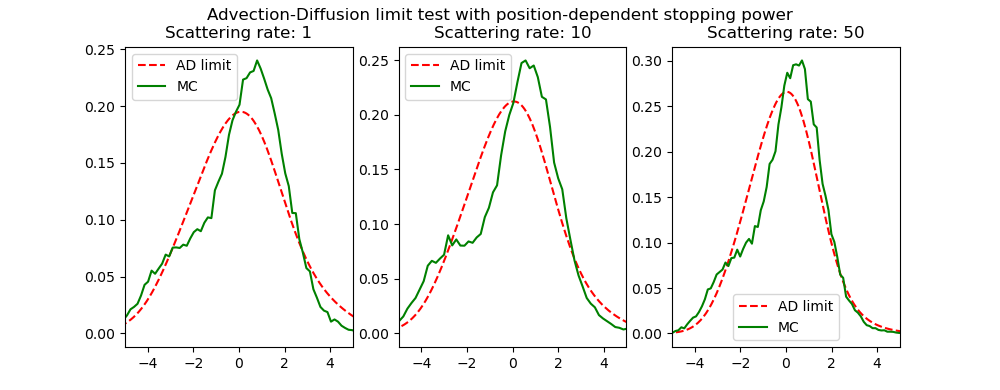

In [6]:
# Plot solutions

# Stopping power at xres
xres = np.linspace(-xmax, xmax, xbins, endpoint=False)
sp_xres = np.zeros_like(xres)
for index, x in enumerate(xres):
    sp_xres[index] = particle1.evalStoppingPower(eSource, np.array((x, None, None), dtype=float), None)

# Advection-diffusion solution
ADres1 = storage1.data[-1]/sp_xres
ADres2 = storage2.data[-1]/sp_xres
ADres3 = storage3.data[-1]/sp_xres

# MC solution 1
xdensity1 = trackEndEstimatorx1.scoreMatrix
binVal1, binEdge1 = np.histogram(xdensity1, bins=100, density=True)
binCenter1 = (binEdge1[:-1] + binEdge1[1:])/2.0

# MC solution 2
xdensity2 = trackEndEstimatorx2.scoreMatrix
binVal2, binEdge2 = np.histogram(xdensity2, bins=100, density=True)
binCenter2 = (binEdge2[:-1] + binEdge2[1:])/2.0

# MC solution 3
xdensity3 = trackEndEstimatorx3.scoreMatrix
binVal3, binEdge3 = np.histogram(xdensity3, bins=100, density=True)
binCenter3 = (binEdge3[:-1] + binEdge3[1:])/2.0

# Plotting
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3.9))

ax1.plot(xres, ADres1, 'r--', label=f'AD limit')
ax1.plot(binCenter1, binVal1, 'g', label=f'MC')
ax1.set_xlim((-5, 5))
ax1.legend()
ax1.set_title(f'Scattering rate: {scatteringRate1}')

ax2.plot(xres, ADres2, 'r--', label=f'AD limit')
ax2.plot(binCenter2, binVal2, 'g', label=f'MC')
ax2.set_xlim((-5, 5))
ax2.legend()
ax2.set_title(f'Scattering rate: {scatteringRate2}')

ax3.plot(xres, ADres3, 'r--', label=f'AD limit')
ax3.plot(binCenter3, binVal3, 'g', label=f'MC')
ax3.set_xlim((-5, 5))
ax3.legend()
ax3.set_title(f'Scattering rate: {scatteringRate3}')

fig.suptitle('Advection-Diffusion limit test with position-dependent stopping power')